    Este proyecto muestra lo solicitado según los hitos entregados.

# <span style="color:cyan"> HITO 1

### <span style="color:#87CEEB"> El enunciado debe estar clarificado, considerando el tipo de problema a resolver. Se deben considerar las librerías a implementar.

    La base de datos con la que se trabajará a lo largo de esta prueba contiene información acerca de la polaridad de sentimientos de Twitter.
    Para esto, se solicita alcanzar el mejor desempeño posible para clasificar si un tweet tiene una polaridad positiva o negativa en cuanto al sentimiento que expresa.
    Para este caso el vector objetivo corresponde a 'sentiment', el cual dado los valores que presenta será necesario recodificar seguiendo unas indicaciones dadas en el enunciado.
    Esta base de datos tiene solo un atributo llamado 'content', que contiene 'tweets', los que se procesarán para realizar las clasificaciones de sentimiento.

    Las librerías a implementar se detallan a continuación:

In [1]:
# Ingesta
import numpy as np
import pandas as pd
import scipy.stats as stats

# Preprocesamiento
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re
from optbinning import OptimalBinning
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Modelación
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Otros
import pickle
#import warnings
#warnings.filterwarnings("ignore")

(CVXPY) May 03 01:26:51 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 03 01:26:51 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


    Las librerías se obtuvieron desde 'conda list'
    
    # Name                    Version                   Build
    imbalanced-learn          0.10.1           py39haa95532_0
    matplotlib                3.7.1            py39haa95532_1
    nltk                      3.7                pyhd3eb1b0_0
    numpy                     1.23.5           py39h3b20f71_0
    optbinning                0.17.3                   pypi_0
    pandas                    1.5.3            py39hf11a4ad_0
    pickleshare               0.7.5           pyhd3eb1b0_1003
    scikit-learn              1.2.2            py39hd77b12b_0
    scipy                     1.10.1           py39h321e85e_0
    seaborn                   0.12.2           py39haa95532_0
    statsmodels               0.13.5           py39h080aedc_1

### <span style="color:#87CEEB"> El tipo de métricas a implementar

    Con las métricas se busca analizar el desempeño del modelo en la predicción con nuevas observaciones.
    Para esto, existen varias métricas. Las que se utilizarán en este proyecto son:
    
        - Matriz de confusión: muestra la cantidad de predicciones verdaderas y falsas para cada clase. La matriz de confusión tiene cuatro entradas: verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

        - Accuracy: mide la proporción de predicciones correctas en comparación con el total de predicciones. La exactitud puede ser engañosa cuando la distribución de las clases no está equilibrada, ya que un modelo puede tener una alta exactitud al predecir la clase mayoritaria, pero ser muy malo al predecir la clase minoritaria.

        - Precision: mide la proporción de verdaderos positivos entre todos los resultados positivos predichos.

        - Recall: mide la proporción de verdaderos positivos entre todos los resultados positivos reales.

        - F1-Score: combina precisión y recall en una sola métrica, es una media armónica entre ambas.

        - Curva ROC: mide la capacidad del modelo para distinguir entre las clases positivas y negativas. El AUC-ROC es útil cuando se necesita comparar modelos en términos de su capacidad para distinguir entre las clases positivas y negativas.

### <span style="color:#87CEEB"> ¿Qué estrategia de división de muestras?

    La división de muestras se refiere a la forma en que los datos se dividen en conjuntos de entrenamiento y prueba. Este es un paso importante en el proceso de entrenamiento y evaluación del modelo. 
    En este caso se utilizará la función train_test_split que se obtiene importando desde el módulo 'model_selection' de sklearn.

### <span style="color:#87CEEB"> ¿Qué tipo de preprocesamiento se implementará?

    El preprocesamiento de datos es un paso importante en la construcción de modelos de aprendizaje automático. Las técnicas de preprocesamiento se utilizan para limpiar y transformar los datos en un formato adecuado para el entrenamiento del modelo.
    Para este problema se analizará la presencia de datos perdidos, estandarización, recodificación de variables categóricas, reducción de dimensionalidad y balanceo de clases en caso de ser necesario.
    En el caso del preprocesamiento de texto se implementará el uso de stopwords, lematización y stemming. Todo esto con la finalidad de reducir la cantidad de palabras que no aportan poder predictivo a los modelos.

### <span style="color:#87CEEB"> Declarar por lo menos cinco modelos con una grilla de hiperparámetros tentativa

    Los modelos que se implementarán son:

    - Gradient Boosting: Tiene la capacidad de manejar datos no lineales y ruidosos.

    - Árboles de decisión: Los árboles de decisión son buenos para problemas con un gran número de características y pueden manejar valores perdidos y valores extremos.

    - Random Fores: Este modelo es una mejora de los árboles de decisión. Es capaz de manejar datos no lineales y ruidosos y puede identificar patrones complejos en los datos.

    - Linear Discriminant Analysis: LDA es especialmente útil cuando se tienen muchas características y se necesita una forma de reducir la dimensionalidad del conjunto de datos.

    - Naive Bayes (Bernoulli): Es un modelo de clasificación probabilístico que se utiliza comúnmente para el procesamiento de texto. Es especialmente útil cuando se tiene un gran número de características, ya que puede manejar datos dispersos y es rápido de entrenar y predecir.

    - Regresión logística se utiliza comúnmente para la clasificación binaria y multiclase. Es fácil de interpretar y puede proporcionar una probabilidad de pertenencia a una clase determinada.

    Las grillas definidas a continuación se utilizarán para una primera iteración de los modelos. A partir de los resultados obtenidos se evaluará realizar un balanceo de clases y modificar las grillas para incrementar el desempeño.

``` python
# Gradient Boosting
gb_grid_v1 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]}

# Decision Tree Classifier
dec_tree_grid_v1 = {
    'min_samples_split': [2, 5, 10],
    'max_depth': [None, 1, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
    }

# Random Forest Classifier
rf_grid_v1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}

# Linear Discriminant Analysis
lda_grid_v1 = {
    'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5], [0.7, 0.3], [0.9, 0.1]],
    'solver': ['svd'], 
    'tol': [0.0001, 0.001, 0.01]
}

# BernoulliNB
bernoulli_nb_grid_v1 = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'binarize': [None, 0.1, 0.5, 0.9],
    'fit_prior': [True, False]
}

# Logistic Regression
lr_grid_v1 = {    
    'C': [0.1, 1, 10, 100],
    'fit_intercept': [True, False], 
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500]
}

```

### <span style="color:#87CEEB"> Se debe analizar el comportamiento del vector objetivo.

In [2]:
df = pd.read_csv('training_tweets.csv').drop('Unnamed: 0', axis=1)
df.head()

,content,sentiment
0,Happy Mama's day to all mothers,love
1,@LysdelTellez I am lost. Please help me find a...,worry
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,you@snapplynn Wish that would have been your t...,neutral
4,now i am doing the MicroEconomics project iha...,worry


In [3]:
df['sentiment'].describe()

count       30000
unique         13
top       neutral
freq         6451
Name: sentiment, dtype: object

    Se observa que el vector objetivo es de tipo categórico y está compuesto de 30000 observaciones. Tiene 13 clases, de las cuales la mayor frecuencia corresponde a 'neutral' con 6451 ocurrencias.

In [4]:
df['sentiment'].value_counts()

neutral       6451
worry         6337
happiness     3952
sadness       3869
love          2908
surprise      1619
fun           1331
relief        1158
hate           975
empty          617
enthusiasm     559
boredom        135
anger           89
Name: sentiment, dtype: int64

In [5]:
(df['sentiment'].value_counts('%')*100).round(2)

neutral       21.50
worry         21.12
happiness     13.17
sadness       12.90
love           9.69
surprise       5.40
fun            4.44
relief         3.86
hate           3.25
empty          2.06
enthusiasm     1.86
boredom        0.45
anger          0.30
Name: sentiment, dtype: float64

    Se observa que la clase 'neutral' tiene un porcentaje de apariciones de 21.5%, seguido de 'worry'.
    Cabe señalar que al momento de recodificar, la clase 'neutral' tendrá una gran importancia en el equilibrio del vector objetivo.
    Lo mostrado anteriormente en porcentajes es posible observarlo de manera gráfica a continuación.

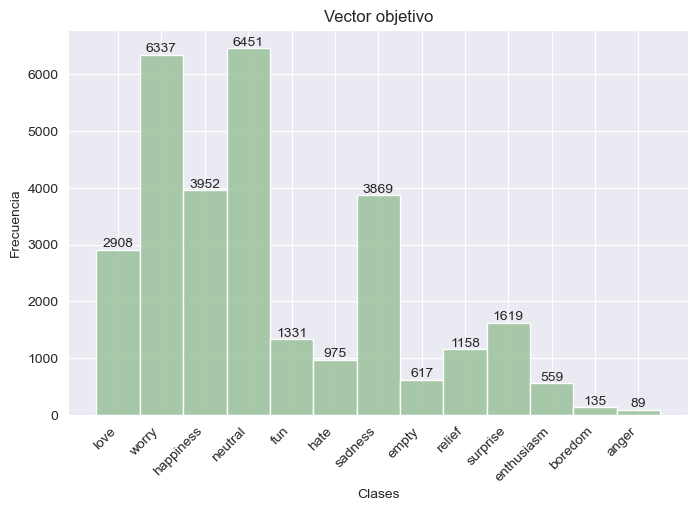

In [6]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['sentiment'], color='darkseagreen')
plt.xticks(rotation=45, ha='right')
plt.title('Vector objetivo')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
for i in ax.containers:
        ax.bar_label(i, label_type='edge')

### <span style="color:#87CEEB"> Se debe reportar el patrón de datos perdidos.

In [7]:
# Datos perdidos en el vector objetivo y columna de atributos
for col in df.columns:
    print(col)
    print(df[col].isna().value_counts(),'\n','-'*30)

content
False    30000
Name: content, dtype: int64 
 ------------------------------
sentiment
False    30000
Name: sentiment, dtype: int64 
 ------------------------------


    No existen datos perdidos en esta base de datos tanto para el vector objetivo como para la variable content.

### <span style="color:#87CEEB"> Se debe implementar recodificaciones para el vector objetivo.

In [8]:
np.random.seed(94)

# Diccionario de recodificación
recodificacion = {
    'worry': 'Negativa',
    'happiness': 'Positiva',
    'sadness': 'Negativa',
    'love': 'Positiva',
    'surprise': 'Positiva',
    'fun': 'Positiva',
    'relief': 'Positiva',
    'hate': 'Negativa',
    'empty': 'Negativa',
    'enthusiasm': 'Positiva',
    'boredom': 'Negativa',
    'anger': 'Negativa',
    'neutral': np.random.choice(['Positiva', 'Negativa'])
}
# Recodificación de la columna 'sentiment'
df['sentiment_recod'] = df['sentiment'].map(recodificacion)

df = df.drop('sentiment', axis=1)

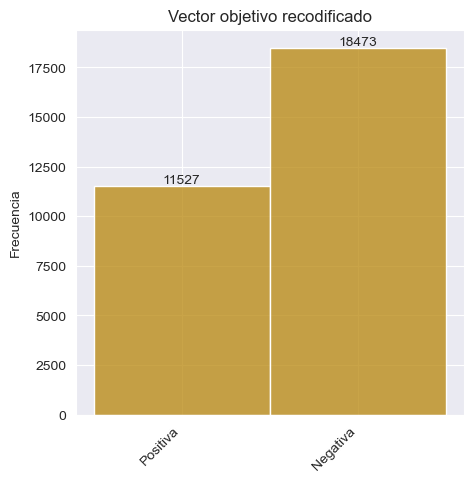

In [9]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df['sentiment_recod'], color='darkgoldenrod')
plt.xticks(rotation=45, ha='right')
plt.title('Vector objetivo recodificado')
plt.xlabel('')
plt.ylabel('Frecuencia')
for i in ax.containers:
        ax.bar_label(i, label_type='edge')

In [10]:
df['sentiment_recod'].value_counts()

Negativa    18473
Positiva    11527
Name: sentiment_recod, dtype: int64

    Se observa un desbalance de clases en el vector objetivo. Este puede tener un impacto negativo en la calidad de los modelos que se van a implementar.
    Cuando ocurre esto, los modelos tienden a clasificar la mayoría de las muestras como pertenecientes a la clase más frecuente, lo que puede resultar en un sesgo y una precisión más baja para la clase minoritaria.

# <span style="color:cyan"> HITO 2

#### <span style="color:#87CEEB"> Analizar el comportamiento del vector objetivo.
    - Realizado en el hito 1

#### <span style="color:#87CEEB"> Reportar el patrón de datos perdidos.
    - Realizado en el hito 1

#### <span style="color:#87CEEB"> Implementar recodificaciones para el vector objetivo.
    - Realizado en el hito 1

### <span style="color:#87CEEB"> Preprocesamiento de texto

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
# Función para preprocesar el texto
def preprocess_text(text):
    # Eliminar caracteres especiales, números y convertir a minúsculas
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Tokenizar el texto en palabras individuales
    words = text.split()

    # stopwords que no tienen aporte en el sentimiento. También se agregaron algunos carácteres.
    my_stopwords = ['quot', 'think', 'lol', 'com', 'im', 'amp', 'ca', 'new','na', 'll',
                'say', 'twitter', 'watch', 've', 'twitpic', 'lt', 'tweet', 'ok', 'let', "'s", '&', ';', '/']
    custom_stopwords = set(stopwords.words('english'))
    custom_stopwords.update(my_stopwords)
    words = [w for w in words if not w in custom_stopwords]

    # Lematizar las palabras
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Realizar stemming de las palabras
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(w) for w in words]

    # Unir las palabras en una sola cadena de texto
    text = ' '.join(words)
    return text

# Aplicar la función de preprocesamiento a cada tweet
df['processed_text'] = df['content'].apply(preprocess_text)

    En esta función se preprocesa la columna que contiene los tweets.
    Para esto se utilizaron stopwords, lematización y stemming para reducir la cantidad de palabras de la base de datos y mejorar la calidad del análisis de texto.
    Las stopwords son palabras comunes que se eliminan porque no aportan información valiosa, la lematización convierte palabras a su forma base y el stemming reduce palabras a su raíz. Todo esto ayuda a hacer el análisis de texto más efectivo.

### <span style="color:#87CEEB"> Representación de cada palabra como atributo

In [13]:
# Instanciar el objeto CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
# Vectorizar el texto preprocesado
vectorized_text = vectorizer.fit_transform(df['processed_text'])
# palabras en todo el dataframe df['preprocessed_text']
words = vectorizer.get_feature_names_out()
# Convertir la matriz dispersa a una matriz densa
dense_matrix = vectorized_text.toarray()
# dataframe con la matriz densa y el vocabulario como columnas
vectorized_data = pd.DataFrame(dense_matrix, columns=words)
# frecuencia para cada palabra
words_freq = dense_matrix.sum(axis=0)
# palabras a dataframe simple
words_freq_df = pd.DataFrame([list(words), list(words_freq)]).T
# renombro columnas y ordeno de mayor a menor frecuencia
words_freq_df.columns = ['words', 'freq']
words_freq_df = words_freq_df.sort_values(by='freq', ascending=False)
# Combinar el dataframe de palabras con el dataframe original
df_procesado = pd.concat([df, vectorized_data], axis=1)
# Eliminar la columna de texto procesado
df_procesado = df_procesado.drop('processed_text', axis=1)

In [14]:
df_procesado.head()

,content,sentiment_recod,aa,aaa,aaaa,aaaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaamaz,aaaaaaaafternoon,...,zyot,zywwj,zzerb,zzre,zzwhitejd,zzz,zzzz,zzzzi,zzzzz,zzzzzzz
0,Happy Mama's day to all mothers,Positiva,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,@LysdelTellez I am lost. Please help me find a...,Negativa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"@BoomKatt yes yes I AM, networking whore to th...",Positiva,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,you@snapplynn Wish that would have been your t...,Negativa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,now i am doing the MicroEconomics project iha...,Negativa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
words_freq_df

,words,freq
6539,day,2825
10656,good,1758
30741,work,1674
16467,love,1623
15955,like,1551
...,...,...
12801,inlovewithjona,1
12797,inland,1
12796,inkswamp,1
12794,inkrediblenyc,1


    Identifico palabras con una frecuencia menor o igual a 100, dada la baja relevancia en la totalidad de tweets.

In [16]:
words_freq_df[words_freq_df['freq'] <= 100]

,words,freq
11791,high,100
27948,ticket,100
8914,facebook,100
11521,heard,99
4157,card,99
...,...,...
12801,inlovewithjona,1
12797,inland,1
12796,inkswamp,1
12794,inkrediblenyc,1


In [17]:
# Guardo aquellas palabras en una lista.
lista_freq_menor_100 = ((words_freq_df[words_freq_df['freq'] <= 100])['words']).tolist()

# Usando la lista recién creada, elimino del dataframe 'words_freq_df' esas variables para disminuir la dimensionalidad.
df_reducido = df_procesado.drop(lista_freq_menor_100, axis=1)

df_reducido.shape

(30000, 317)

    Con lo realizado, se redujo la dimensionalidad a 317 columnas, descartando 31375.

##### <span style="color:#87CEEB"> Implementación de IV

In [18]:
# Binarización de vector objetivo
df_reducido['sentiment_bin'] = np.where(df_reducido['sentiment_recod'] == 'Positiva', 1, 0)

# ELimino 'content' y sentiment_recod' para solo dejar el vector objetivo y los atributos
df_reducido = df_reducido.drop(['sentiment_recod'], axis=1)

In [19]:
df_reducido.head()

,abl,actual,ago,alon,alreadi,alway,amaz,anoth,anymor,anyon,...,www,xx,ya,yay,yeah,year,yes,yesterday,youtub,sentiment_bin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Separación de muestras de entrenamiento y pruebas para obtener el IV
X_optb = df_reducido.drop('sentiment_bin', axis=1)
y = df_reducido['sentiment_bin']

rep_seed = 94
X_train_optb, X_test_optb, y_train_optb, y_test_optb = train_test_split(X_optb, y,
                                                    test_size=.33, 
                                                    random_state=rep_seed)

In [21]:
lista_atributos = df_reducido.iloc[:, :-2].columns

In [22]:
from optbinning import OptimalBinning

iv_values = []
for index, variable in enumerate(lista_atributos):
    optb = OptimalBinning(name=variable, dtype='numerical', solver='cp')
    optb.fit(X_train_optb[variable], y_train_optb)
    binning_table = optb.binning_table.build()
    binning_results = binning_table.loc['Totals', 'IV'].round(4)
    iv_binning_table = [variable, binning_results]
    iv_values.append(iv_binning_table)

iv_values

[['abl', 0.0],
 ['actual', 0.0],
 ['ago', 0.0],
 ['alon', 0.0],
 ['alreadi', 0.0],
 ['alway', 0.0],
 ['amaz', 0.0],
 ['anoth', 0.0],
 ['anymor', 0.0],
 ['anyon', 0.0],
 ['anyth', 0.0],
 ['ask', 0.0],
 ['aw', 0.0],
 ['away', 0.0],
 ['awesom', 0.0],
 ['aww', 0.0],
 ['awww', 0.0],
 ['babi', 0.0],
 ['bad', 0.0],
 ['beauti', 0.0],
 ['bed', 0.0],
 ['believ', 0.0],
 ['best', 0.0],
 ['better', 0.0],
 ['big', 0.0],
 ['birthday', 0.0],
 ['bit', 0.0],
 ['blog', 0.0],
 ['boo', 0.0],
 ['book', 0.0],
 ['bore', 0.0],
 ['boy', 0.0],
 ['break', 0.0],
 ['brother', 0.0],
 ['busi', 0.0],
 ['buy', 0.0],
 ['came', 0.0],
 ['car', 0.0],
 ['cat', 0.0],
 ['caus', 0.0],
 ['chang', 0.0],
 ['check', 0.0],
 ['class', 0.0],
 ['clean', 0.0],
 ['close', 0.0],
 ['coffe', 0.0],
 ['cold', 0.0],
 ['come', 0.0],
 ['comput', 0.0],
 ['cool', 0.0],
 ['cri', 0.0],
 ['cute', 0.0],
 ['dad', 0.0],
 ['damn', 0.0],
 ['day', 0.0508],
 ['didnt', 0.0],
 ['die', 0.0],
 ['dinner', 0.0],
 ['dog', 0.0],
 ['dont', 0.0],
 ['dream', 0.0],
 [

In [23]:
# valores de IV filtrados
filtered_values = [item for item in iv_values if item[1] > 0]
print(filtered_values)

[['day', 0.0508], ['good', 0.0255], ['like', 0.0001], ['love', 0.1294], ['work', 0.009]]


    El IV (Information Value) es una medida de la capacidad predictiva de una variable en un modelo de clasificación. En este caso, luego de implementar y filtrar los valores de IV mayores a cero, se obtuvo que solamente cinco variables cumplen esta condición.
    A partir de los valores obtenidos, se tomó la decisión de considerar las 100 variables con mayor frecuencia y crear un nuevo dataframe que las contenga. Dentro de estas 100 variables estan contenidas las cinco que se obtuvieron filtrando el IV. 

In [24]:
words_freq_df.head(100)

,words,freq
6539,day,2825
10656,good,1758
30741,work,1674
16467,love,1623
15955,like,1551
...,...,...
8432,enjoy,262
25688,song,260
31195,yay,259
25672,someth,257


In [25]:
top_100_list = words_freq_df.loc[:,'words'][:100].to_list()

In [26]:
df_top_100 = df_reducido.loc[:, top_100_list + ['sentiment_bin']]

In [27]:
df_top_100.sample()

,day,good,work,love,like,http,today,got,time,happi,...,wanna,phone,ur,eat,enjoy,song,yay,someth,lot,sentiment_bin
7691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_top_100.shape

(30000, 101)

#### <span style="color:#87CEEB"> Separación de muestras de entrenamiento y pruebas para el nuevo dataframe obtenido

In [29]:
# Separación de muestras de entrenamiento y pruebas
X = df_top_100.drop('sentiment_bin', axis=1)
y = df_top_100['sentiment_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.33, 
                                                    random_state=rep_seed)


# estandarización
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### <span style="color:#87CEEB"> Las grillas de hiperparámetros para cada uno de los cinco modelos propuestos deben estar declaradas.

In [30]:
# Las grillas de hiperparámetros tentativas para cada modelo son:

# Gradient Boosting
gb_grid_v1 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]}

# Decision Tree Classifier
dec_tree_grid_v1 = {
    'min_samples_split': [2, 5, 10],
    'max_depth': [None, 1, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
    }

# Random Forest Classifier
rf_grid_v1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}

# Linear Discriminant Analysis
lda_grid_v1 = {
    'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5], [0.7, 0.3], [0.9, 0.1]],
    'solver': ['svd'], 
    'tol': [0.0001, 0.001, 0.01]
}

# BernoulliNB
bernoulli_nb_grid_v1 = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'binarize': [None, 0.1, 0.5, 0.9],
    'fit_prior': [True, False]
}

# Logistic Regression
lr_grid_v1 = {    
    'C': [0.1, 1, 10, 100],
    'fit_intercept': [True, False], 
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500]
}


    Como se mencionó anteriormente, estas grillas son para una primera iteración de los modelos. De acuerdo a los resultados obtenidos se evaluará modificar sus valores.

##### <span style="color:#87CEEB"> Generar la búsqueda de grilla de por lo menos dos modelos, preservando la información en un archivo serializado.

In [31]:
from sklearn.model_selection import GridSearchCV
import pickle

## MODELO 1 Gradient Boosting

In [32]:
gb_model_v1 = GridSearchCV(GradientBoostingClassifier(random_state=rep_seed),
                                param_grid = gb_grid_v1,
                                cv=5,
                                verbose=1,
                                n_jobs=-1)

# ajuste modelo
gb_model_v1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=94),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [33]:
gb_model_v1.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [34]:
# predicciones train y test
gb_yhat_train_v1 = gb_model_v1.predict(X_train_scaled)
gb_yhat_test_v1 = gb_model_v1.predict(X_test_scaled)

In [35]:
def print_metricas(y_train, model_yhat_train, model_yhat_test, name_model):    
    """
    Imprime las métricas para cada modelo.

    Parameters
    ----------
    y_train: variable
        vector objetivo de entrenamiento
    model_yhat: variable
            predicciones del modelo
    name_model: str
        nombre para identificar el modelo

    Returns
        None
    """
    # matriz de confusión
    matriz_confusion = confusion_matrix(y_true=y_test, y_pred=model_yhat_test)
    print(f'Matriz de confusión {name_model}, testing:\n', matriz_confusion,'\n\n','-'*55,'\n')

    # classification report training 
    classif_report = classification_report(y_true=y_train, y_pred=model_yhat_train)
    print(f'Classification_report training {name_model}:\n', classif_report,'\n','-'*55,'\n')

    # classification report testing 
    classif_report = classification_report(y_true=y_test, y_pred=model_yhat_test)
    print(f'Classification_report testing {name_model}:\n', classif_report)

# métricas
print_metricas(y_train=y_train, model_yhat_train=gb_yhat_train_v1, model_yhat_test=gb_yhat_test_v1, name_model='gradient boosting')

Matriz de confusión gradient boosting, testing:
 [[5439  640]
 [2325 1496]] 

 ------------------------------------------------------- 

Classification_report training gradient boosting:
               precision    recall  f1-score   support

           0       0.71      0.90      0.80     12394
           1       0.73      0.42      0.53      7706

    accuracy                           0.72     20100
   macro avg       0.72      0.66      0.67     20100
weighted avg       0.72      0.72      0.70     20100
 
 ------------------------------------------------------- 

Classification_report testing gradient boosting:
               precision    recall  f1-score   support

           0       0.70      0.89      0.79      6079
           1       0.70      0.39      0.50      3821

    accuracy                           0.70      9900
   macro avg       0.70      0.64      0.64      9900
weighted avg       0.70      0.70      0.68      9900



## MODELO 1 Decision Tree Classifier

In [36]:
dec_tree_model_v1 = GridSearchCV(DecisionTreeClassifier(random_state=rep_seed),
                                param_grid = dec_tree_grid_v1,
                                cv=5,
                                verbose=1,
                                n_jobs=-1)

# ajuste modelo
dec_tree_model_v1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=94), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [37]:
dec_tree_model_v1.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [38]:
# predicciones train y test
dec_tree_yhat_train_v1 = dec_tree_model_v1.predict(X_train_scaled)
dec_tree_yhat_test_v1 = dec_tree_model_v1.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train, model_yhat_train=dec_tree_yhat_train_v1, model_yhat_test=dec_tree_yhat_test_v1, name_model='decision tree')

Matriz de confusión decision tree, testing:
 [[5299  780]
 [2318 1503]] 

 ------------------------------------------------------- 

Classification_report training decision tree:
               precision    recall  f1-score   support

           0       0.71      0.88      0.79     12394
           1       0.70      0.43      0.53      7706

    accuracy                           0.71     20100
   macro avg       0.70      0.66      0.66     20100
weighted avg       0.71      0.71      0.69     20100
 
 ------------------------------------------------------- 

Classification_report testing decision tree:
               precision    recall  f1-score   support

           0       0.70      0.87      0.77      6079
           1       0.66      0.39      0.49      3821

    accuracy                           0.69      9900
   macro avg       0.68      0.63      0.63      9900
weighted avg       0.68      0.69      0.67      9900



## MODELO 1 Random Forest

In [39]:
rf_model_v1 = GridSearchCV(RandomForestClassifier(random_state=rep_seed),
                            param_grid = rf_grid_v1,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# ajuste modelo
rf_model_v1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=94), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [40]:
rf_model_v1.best_params_

{'max_depth': 30, 'max_features': 'log2', 'n_estimators': 300}

In [41]:
# predicciones train y test
rf_yhat_train_v1 = rf_model_v1.predict(X_train_scaled)
rf_yhat_test_v1 = rf_model_v1.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train, model_yhat_train=rf_yhat_train_v1, model_yhat_test=rf_yhat_test_v1, name_model='random forest')

Matriz de confusión random forest, testing:
 [[5445  634]
 [2384 1437]] 

 ------------------------------------------------------- 

Classification_report training random forest:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83     12394
           1       0.84      0.46      0.60      7706

    accuracy                           0.76     20100
   macro avg       0.79      0.70      0.71     20100
weighted avg       0.78      0.76      0.74     20100
 
 ------------------------------------------------------- 

Classification_report testing random forest:
               precision    recall  f1-score   support

           0       0.70      0.90      0.78      6079
           1       0.69      0.38      0.49      3821

    accuracy                           0.70      9900
   macro avg       0.69      0.64      0.64      9900
weighted avg       0.69      0.70      0.67      9900



## MODELO 1 LDA

In [42]:
lda_model_v1 = GridSearchCV(LinearDiscriminantAnalysis(),
                            param_grid = lda_grid_v1,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# ajuste modelo
lda_model_v1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5],
                                    [0.7, 0.3], [0.9, 0.1]],
                         'solver': ['svd'], 'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [43]:
lda_model_v1.best_params_

{'priors': None, 'solver': 'svd', 'tol': 0.0001}

In [44]:
# predicciones train y test
lda_yhat_train_v1 = lda_model_v1.predict(X_train_scaled)
lda_yhat_test_v1 = lda_model_v1.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train, model_yhat_train=lda_yhat_train_v1, model_yhat_test=lda_yhat_test_v1, name_model='lda')

Matriz de confusión lda, testing:
 [[5426  653]
 [2315 1506]] 

 ------------------------------------------------------- 

Classification_report training lda:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79     12394
           1       0.70      0.41      0.52      7706

    accuracy                           0.71     20100
   macro avg       0.70      0.65      0.65     20100
weighted avg       0.71      0.71      0.69     20100
 
 ------------------------------------------------------- 

Classification_report testing lda:
               precision    recall  f1-score   support

           0       0.70      0.89      0.79      6079
           1       0.70      0.39      0.50      3821

    accuracy                           0.70      9900
   macro avg       0.70      0.64      0.64      9900
weighted avg       0.70      0.70      0.68      9900



## MODELO 1 BernoulliNB

In [45]:
bernoulli_nb_model_v1 = GridSearchCV(BernoulliNB(),
                                    param_grid = bernoulli_nb_grid_v1,
                                    cv=5,
                                    verbose=1,
                                    n_jobs=-1)
                                
# ajuste modelo
bernoulli_nb_model_v1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0],
                         'binarize': [None, 0.1, 0.5, 0.9],
                         'fit_prior': [True, False]},
             verbose=1)

In [46]:
bernoulli_nb_model_v1.best_params_

{'alpha': 0.001, 'binarize': 0.1, 'fit_prior': True}

In [47]:
# predicciones train y test
bernoulli_nb_yhat_train_v1 = bernoulli_nb_model_v1.predict(X_train_scaled)
bernoulli_nb_yhat_test_v1 = bernoulli_nb_model_v1.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train, model_yhat_train=bernoulli_nb_yhat_train_v1, model_yhat_test=bernoulli_nb_yhat_test_v1, name_model='bernoulli_nb')

Matriz de confusión bernoulli_nb, testing:
 [[5349  730]
 [2269 1552]] 

 ------------------------------------------------------- 

Classification_report training bernoulli_nb:
               precision    recall  f1-score   support

           0       0.71      0.88      0.79     12394
           1       0.69      0.42      0.53      7706

    accuracy                           0.71     20100
   macro avg       0.70      0.65      0.66     20100
weighted avg       0.70      0.71      0.69     20100
 
 ------------------------------------------------------- 

Classification_report testing bernoulli_nb:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78      6079
           1       0.68      0.41      0.51      3821

    accuracy                           0.70      9900
   macro avg       0.69      0.64      0.64      9900
weighted avg       0.69      0.70      0.68      9900



## MODELO 1 Logistic Regression

In [48]:
lr_model_v1 = GridSearchCV(LogisticRegression(random_state=rep_seed),
                        param_grid=lr_grid_v1,
                        cv=5,
                        verbose=1,
                        n_jobs=-1
)

# ajuste modelo
lr_model_v1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=94), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 500]},
             verbose=1)

In [49]:
lr_model_v1.best_params_

{'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100}

In [50]:
# predicciones train y test
lr_yhat_train_v1 = lr_model_v1.predict(X_train_scaled)
lr_yhat_test_v1 = lr_model_v1.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train, model_yhat_train=lr_yhat_train_v1, model_yhat_test=lr_yhat_test_v1, name_model='logistic regression')

Matriz de confusión logistic regression, testing:
 [[5403  676]
 [2293 1528]] 

 ------------------------------------------------------- 

Classification_report training logistic regression:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79     12394
           1       0.70      0.42      0.52      7706

    accuracy                           0.71     20100
   macro avg       0.70      0.65      0.66     20100
weighted avg       0.71      0.71      0.69     20100
 
 ------------------------------------------------------- 

Classification_report testing logistic regression:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78      6079
           1       0.69      0.40      0.51      3821

    accuracy                           0.70      9900
   macro avg       0.70      0.64      0.65      9900
weighted avg       0.70      0.70      0.68      9900



    Se observa que en esta primera iteración, todos los valores de f1_score para la muestra de validación a excepción de random forest y decision tree, tienen valores entre 0.5 y 0.51 para la clase 1; y para la clase 0 estos valores varían entre 0.77 y 0.78. Para las demás métricas, los resultados son similares.
    Random forest y decision tree presentan un puntaje f1_score para la clase 1 de 0.49.

    Donde todos los modelos fallan en clasificar es en el recall. Para los datos de validación los resultados varían entre 0.38 y 0.41. Siendo esto peor que un clasificador aleatorio.

    Se observa que todas las matrices de confusión para los datos de validación tienen grandes observaciones en el cuadrante que corresponde a falsos negativos (alrededor de 23%). Es decir, están clasificados como negativos cuando en realidad son positivos. Esto es concordante con la métrica recall la cual mide la proporción de casos positivos que el modelo es capaz de identificar correctamente.

    Como recordatorio, la métrica accuracy mide la proporción de predicciones correctas realizadas por un modelo en relación al total de predicciones realizadas.
    Al comparar esta métrica entre entrenamiento y validación de los modelos, no existen grandes diferencias que indiquen una baja capacidad de generalización.
    Sin embargo, a pesar de que los modelos generalizan de manera correcta, el desempeño es mejorable, y eso es lo que se buscará en las siguientes iteraciones.

### <span style="color:#87CEEB"> Curvas ROC de la primera iteración de modelos.

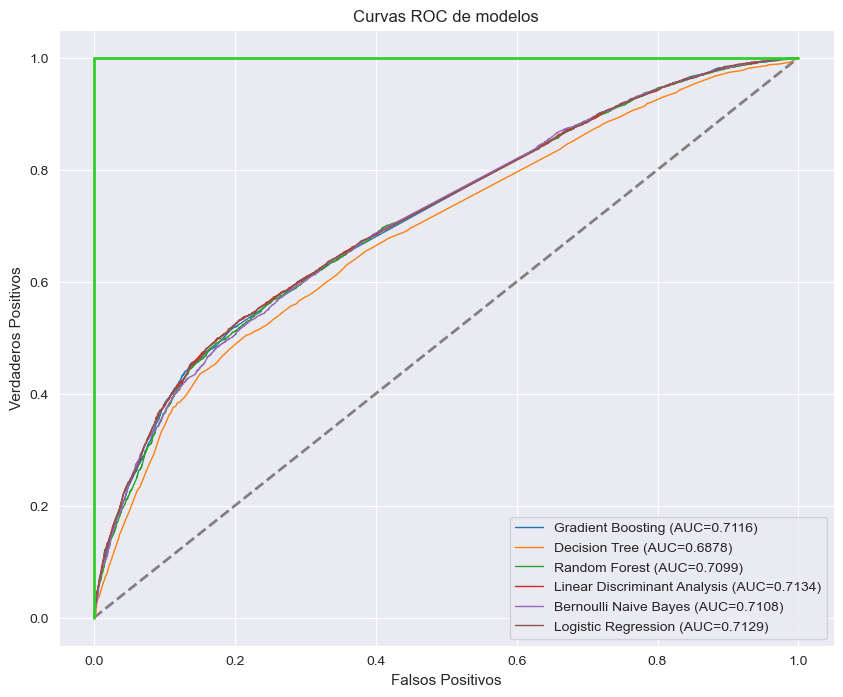

In [51]:
def print_roc_auc(gb_model, dec_tree_model, rf_model, lda_model, bernoulli_nb_model, lr_model, X_test):
    """
    Imprime en un solo gráfico las curvas ROC (test) y los valores AUC (test) para los modelos.

    Parameters
    ----------
    gb_model: variable
            modelo ajustado de Gradient Boosting Classifier
    dec_tree_model: variable
            modelo ajustado de Decision Tree Classifier
    lda_model: variable
            modelo ajustado de Linear Discriminant Analysis
    rf_model: variable
            modelo ajustado de Random Forest Classifier
    bernoulli_nb_model: variable
            modelo ajustado de BernoulliNB (NaiveBayes)
    lr_model: variable
            modelo ajustado de Logistic Regression

    Return
        None
    """
    # Valores de probabilidad para cada modelo
    models = [gb_model, dec_tree_model, rf_model, lda_model, bernoulli_nb_model, lr_model]
    y_hats = [model.predict_proba(X_test)[:, 1] for model in models]

    model_names = ['Gradient Boosting', 'Decision Tree', 'Random Forest', 'Linear Discriminant Analysis',
                    'Bernoulli Naive Bayes', 'Logistic Regression']
    fprs, tprs, labels, auc_scores = [], [], [], []

    for i, y_hat in enumerate(y_hats):
        fpr, tpr, _ = roc_curve(y_test, y_hat)
        fprs.append(fpr)
        tprs.append(tpr)
        labels.append(model_names[i])
        auc_scores.append(round(roc_auc_score(y_test, y_hat), 4))

    # Curvas ROC de cada modelo
    plt.figure(figsize=(10, 8))
    for i in range(len(models)):
        plt.plot(fprs[i], tprs[i], lw=1, label=f"{labels[i]} (AUC={auc_scores[i]})")
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')
    plt.plot([0, 0], [1, 0] , c='limegreen', lw=2), plt.plot([1, 1] , c='limegreen', lw=2)
    plt.xlabel('Falsos Positivos', fontsize=11)
    plt.ylabel('Verdaderos Positivos', fontsize=11)
    plt.title('Curvas ROC de modelos')
    plt.legend()
    plt.show()

print_roc_auc(gb_model=gb_model_v1, dec_tree_model=dec_tree_model_v1, rf_model=rf_model_v1, 
            lda_model=lda_model_v1, bernoulli_nb_model=bernoulli_nb_model_v1, lr_model=lr_model_v1, X_test=X_test_scaled)


    Las curvas ROC (test) muestran que la relación entre la tasa de verdaderos positivos y falsos positivos para la clase 1 es similar en casi todos los modelos. El que más destaca por ser inferior al resto es el modelo de Decision Tree. Este obtuvo un valor de AUC de 0.6878, mientras de los demás valores están sobre 0.71. 
    A pesar que los modelos no presentan un desempeño destacable, cabe señalar que están por sobre un clasificador aleatorio, como se observa en la diagonal punteada.

    En el próximo hito se intentará mejorar los desempeños de los modelos realizando un oversampling mediante SMOTE y modificando las grillas de hiperparámetros.

#### <span style="color:#87CEEB"> Archivo serializado

In [52]:
# import pickle
pickle.dump((# modelos ajustados
            gb_model_v1,
            dec_tree_model_v1,
            rf_model_v1,
            lda_model_v1,
            bernoulli_nb_model_v1,
            lr_model_v1),
            open('modelos_hito_2_rodrigo_sepulveda_prueba_1.sav', 'wb'))

```python
# Lectura archivo .sav
read_models_hito_1 = pickle.load(open("modelos_hito_2_rodrigo_sepulveda_prueba_1.sav","rb"))

# Guardar datos en variables correspondientes
modelo_1, modelo_2, modelo_3, modelo_4, modelo_5, modelo_6 = read_models_hito_2
```

# <span style="color:cyan"> HITO 3

#### <span style="color:#87CEEB"> Entrenar el resto de los modelos declarados mediante la búsqueda de grilla. De ser necesario, se podrá re-especificar los componentes de la grilla.

    Como en el hito 2 se entrenaron todos los modelos a partir de grillas preliminares, ahora se realizará la iteración 2 y 3 de los modelos. Primero se realizará un oversampling (SMOTE) y calcularán las métricas con las primeras grillas, y luego ya aplicado SMOTE se modificarán los rangos de los hiperparámetros.

In [53]:
# Instanciamos la clase
oversampler = SMOTE(random_state=rep_seed, sampling_strategy='minority')

# Oversampling de los datos de entrenamiento
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train_scaled, y_train)

In [54]:
y_train_oversamp.value_counts()

0    12394
1    12394
Name: sentiment_bin, dtype: int64

    Con SMOTE se generan nuevas instancias sintéticas de la clase minoritaria (clase 1). sampling_strategy='minority' se usa para igualar el número de instancias de la clase mayoritaria.

## <span style="color:#87CEEB"> Iteración 2 de los modelos

## MODELO 2 Gradient Boosting

In [55]:
gb_model_v2 = GridSearchCV(GradientBoostingClassifier(random_state=rep_seed),
                            param_grid = gb_grid_v1,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# ajuste modelo
gb_model_v2.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=94),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [56]:
gb_model_v2.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [57]:
# predicciones train y test
gb_yhat_train_v2 = gb_model_v2.predict(X_train_oversamp)
gb_yhat_test_v2 = gb_model_v2.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=gb_yhat_train_v2, model_yhat_test=gb_yhat_test_v2, name_model='gradient boosting')

Matriz de confusión gradient boosting, testing:
 [[5182  897]
 [2090 1731]] 

 ------------------------------------------------------- 

Classification_report training gradient boosting:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76     12394
           1       0.82      0.56      0.67     12394

    accuracy                           0.72     24788
   macro avg       0.74      0.72      0.71     24788
weighted avg       0.74      0.72      0.71     24788
 
 ------------------------------------------------------- 

Classification_report testing gradient boosting:
               precision    recall  f1-score   support

           0       0.71      0.85      0.78      6079
           1       0.66      0.45      0.54      3821

    accuracy                           0.70      9900
   macro avg       0.69      0.65      0.66      9900
weighted avg       0.69      0.70      0.68      9900



## MODELO 2 Decision Tree Classifier

In [58]:
dec_tree_model_v2 = GridSearchCV(DecisionTreeClassifier(random_state=rep_seed),
                                param_grid = dec_tree_grid_v1,
                                cv=5,
                                verbose=1,
                                n_jobs=-1)

# ajuste modelo
dec_tree_model_v2.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=94), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [59]:
dec_tree_model_v2.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10}

In [60]:
# predicciones train y test
dec_tree_yhat_train_v2 = dec_tree_model_v2.predict(X_train_oversamp)
dec_tree_yhat_test_v2 = dec_tree_model_v2.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=dec_tree_yhat_train_v2, model_yhat_test=dec_tree_yhat_test_v2, name_model='decision tree')

Matriz de confusión decision tree, testing:
 [[4799 1280]
 [1983 1838]] 

 ------------------------------------------------------- 

Classification_report training decision tree:
               precision    recall  f1-score   support

           0       0.67      0.82      0.74     12394
           1       0.77      0.59      0.67     12394

    accuracy                           0.71     24788
   macro avg       0.72      0.71      0.70     24788
weighted avg       0.72      0.71      0.70     24788
 
 ------------------------------------------------------- 

Classification_report testing decision tree:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6079
           1       0.59      0.48      0.53      3821

    accuracy                           0.67      9900
   macro avg       0.65      0.64      0.64      9900
weighted avg       0.66      0.67      0.66      9900



## MODELO 2 Random Forest

In [61]:
rf_model_v2 = GridSearchCV(RandomForestClassifier(random_state=rep_seed),
                            param_grid = rf_grid_v1,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# ajuste modelo
rf_model_v2.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=94), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [62]:
rf_model_v2.best_params_

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}

In [63]:
# predicciones train y test
rf_yhat_train_v2 = rf_model_v2.predict(X_train_oversamp)
rf_yhat_test_v2 = rf_model_v2.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=rf_yhat_train_v2, model_yhat_test=rf_yhat_test_v2, name_model='random forest')

Matriz de confusión random forest, testing:
 [[4718 1361]
 [1977 1844]] 

 ------------------------------------------------------- 

Classification_report training random forest:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82     12394
           1       0.87      0.71      0.78     12394

    accuracy                           0.80     24788
   macro avg       0.81      0.80      0.80     24788
weighted avg       0.81      0.80      0.80     24788
 
 ------------------------------------------------------- 

Classification_report testing random forest:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      6079
           1       0.58      0.48      0.52      3821

    accuracy                           0.66      9900
   macro avg       0.64      0.63      0.63      9900
weighted avg       0.65      0.66      0.66      9900



## MODELO 2 LDA

In [64]:
lda_model_v2 = GridSearchCV(LinearDiscriminantAnalysis(),
                            param_grid = lda_grid_v1,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# ajuste modelo
lda_model_v2.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5],
                                    [0.7, 0.3], [0.9, 0.1]],
                         'solver': ['svd'], 'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [65]:
lda_model_v2.best_params_

{'priors': None, 'solver': 'svd', 'tol': 0.0001}

In [66]:
# predicciones train y test
lda_yhat_train_v2 = lda_model_v2.predict(X_train_oversamp)
lda_yhat_test_v2 = lda_model_v2.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=lda_yhat_train_v2, model_yhat_test=lda_yhat_test_v2, name_model='lda')

Matriz de confusión lda, testing:
 [[4877 1202]
 [1855 1966]] 

 ------------------------------------------------------- 

Classification_report training lda:
               precision    recall  f1-score   support

           0       0.63      0.80      0.70     12394
           1       0.72      0.52      0.61     12394

    accuracy                           0.66     24788
   macro avg       0.68      0.66      0.65     24788
weighted avg       0.68      0.66      0.65     24788
 
 ------------------------------------------------------- 

Classification_report testing lda:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      6079
           1       0.62      0.51      0.56      3821

    accuracy                           0.69      9900
   macro avg       0.67      0.66      0.66      9900
weighted avg       0.68      0.69      0.68      9900



## MODELO 2 BernoulliNB

In [67]:
bernoulli_nb_model_v2 = GridSearchCV(BernoulliNB(),
                                    param_grid = bernoulli_nb_grid_v1,
                                    cv=5,
                                    verbose=1,
                                    n_jobs=-1)
                                
# ajuste modelo
bernoulli_nb_model_v2.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0],
                         'binarize': [None, 0.1, 0.5, 0.9],
                         'fit_prior': [True, False]},
             verbose=1)

In [68]:
bernoulli_nb_model_v2.best_params_

{'alpha': 1.0, 'binarize': 0.1, 'fit_prior': True}

In [69]:
# predicciones train y test
bernoulli_nb_yhat_train_v2 = bernoulli_nb_model_v2.predict(X_train_oversamp)
bernoulli_nb_yhat_test_v2 = bernoulli_nb_model_v2.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=bernoulli_nb_yhat_train_v2, model_yhat_test=bernoulli_nb_yhat_test_v2, name_model='bernoulli_nb')

Matriz de confusión bernoulli_nb, testing:
 [[4827 1252]
 [1852 1969]] 

 ------------------------------------------------------- 

Classification_report training bernoulli_nb:
               precision    recall  f1-score   support

           0       0.63      0.79      0.70     12394
           1       0.72      0.53      0.61     12394

    accuracy                           0.66     24788
   macro avg       0.67      0.66      0.65     24788
weighted avg       0.67      0.66      0.65     24788
 
 ------------------------------------------------------- 

Classification_report testing bernoulli_nb:
               precision    recall  f1-score   support

           0       0.72      0.79      0.76      6079
           1       0.61      0.52      0.56      3821

    accuracy                           0.69      9900
   macro avg       0.67      0.65      0.66      9900
weighted avg       0.68      0.69      0.68      9900



## MODELO 2 Logistic Regression

In [70]:
lr_model_v2 = GridSearchCV(LogisticRegression(random_state=rep_seed),
                            param_grid=lr_grid_v1,
                            cv=5,
                            verbose=1,
                            n_jobs=-1
)

# ajuste modelo
lr_model_v2.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=94), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 500]},
             verbose=1)

In [71]:
lr_model_v2.best_params_

{'C': 0.1, 'class_weight': None, 'fit_intercept': False, 'max_iter': 100}

In [72]:
# predicciones train y test
lr_yhat_train_v2 = lr_model_v2.predict(X_train_oversamp)
lr_yhat_test_v2 = lr_model_v2.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=lr_yhat_train_v2, model_yhat_test=lr_yhat_test_v2, name_model='logistic regression')

Matriz de confusión logistic regression, testing:
 [[4744 1335]
 [1789 2032]] 

 ------------------------------------------------------- 

Classification_report training logistic regression:
               precision    recall  f1-score   support

           0       0.63      0.79      0.70     12394
           1       0.71      0.54      0.61     12394

    accuracy                           0.66     24788
   macro avg       0.67      0.66      0.66     24788
weighted avg       0.67      0.66      0.66     24788
 
 ------------------------------------------------------- 

Classification_report testing logistic regression:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      6079
           1       0.60      0.53      0.57      3821

    accuracy                           0.68      9900
   macro avg       0.66      0.66      0.66      9900
weighted avg       0.68      0.68      0.68      9900



    En esta segunda iteración, que consistió en realizar balanceo de clases mediante oversampling (SMOTE) a los datos de entrenamiento, se observa un aumento para la clase 1 en la métrica recall (testing) en todos los modelos, siendo algunos más significativos que otros. La diferencia entre los valores de recall se encuentra en el rango del 6% al 13%, siendo el modelo gradient boosting el que tiene la menor variación y el modelo de logistic regression el que tiene la mayor.

    Al comparar los valores de f1_score, se observa que los modelos decision tree y random forest presentan un valor bajo 0.5 para la clase 1. Los demás son cercanos pero sobre este margen. Respecto a la clase 1 para esta misma métrica, todos los resultados muestran valores sobre 0.77.
    Lo anterior indica que los modelos tienen problemas para precedir de manera correcta las observaciones pertenecientes a la clase 1 (sentimiento positivo).

    Respecto a la generalización, la métrica accuracy disminuyó levemente en algunos casos, pero de manera similar a lo visto en la primera iteración, no hay indicios de una mala capacidad de generalización a excepción del modelo con random forest, cuya diferencia porcentual es de 14%.

    En la tercera iteración se implementarán los modelos modificando las grillas y al igual que en los segundos modelos, se utilizarán los datos de entrenamiento con las clases balanceadas.

### <span style="color:#87CEEB"> Curvas ROC de la segunda iteración de modelos.

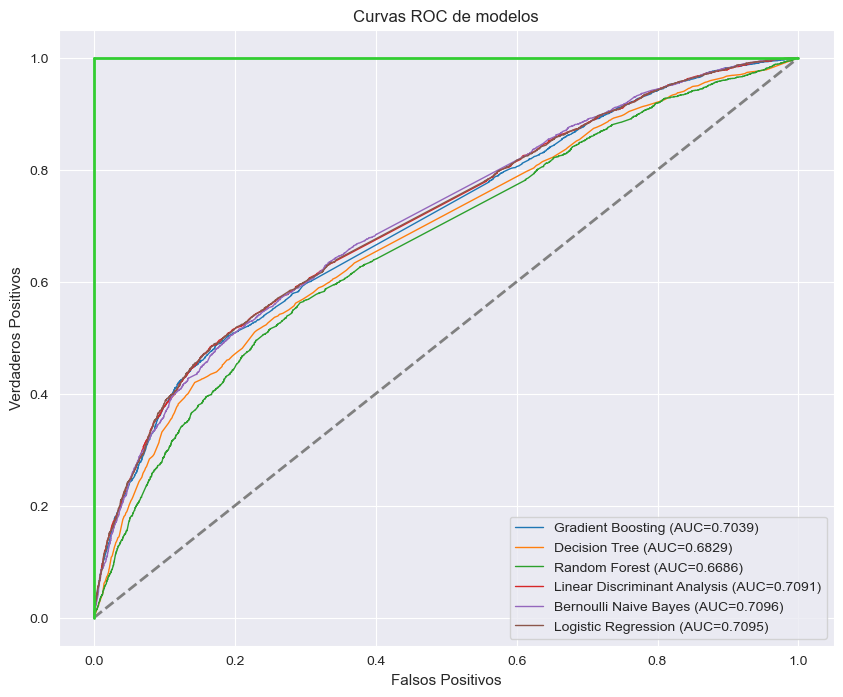

In [73]:
print_roc_auc(gb_model=gb_model_v2, dec_tree_model=dec_tree_model_v2, rf_model=rf_model_v2, 
            lda_model=lda_model_v2, bernoulli_nb_model=bernoulli_nb_model_v2, lr_model=lr_model_v2, X_test=X_test_scaled)

    En esta iteración se observa que las curvas ROC están más separadas comparadas al resultado anterior. Visualmente, los modelos que presentan un menor rendimiento son decision tree y random forest lo que se ve reflejado con los valores de AUC, los cuales son 0.6829 y 0.6686 respectivamente.
    Al comparar los valores actuales de AUC con los previos, estos disminuyeron en todos los modelos.
    A pesar de la disminución, siguen siendo mejor que un clasificador aleatorio.

## <span style="color:#87CEEB"> Iteración 3 de los modelos

    La modificación de grillas consistió en observar los mejores estimadores obtenidos en la segunda iteración. Con estos resultados, se pulieron los rangos de algunos hiperparámetros con la intención de mejorar el desempeño de los modelos.

    Lo que se muestra en esta tercera iteración consistió en realidad en varias iteraciones con el fin de llegar a las grillas que se muestran a continuación.

    Los modelos entrenados en esta sección consideran las nuevas grillas y los datos a los cuales se les realizaron oversampling mediante SMOTE.

In [74]:
# Gradient Boosting
gb_grid_v2 = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]}

# Decision Tree Classifier
dec_tree_grid_v2 = {
    'min_samples_split': [22, 23, 24, 25],
    'max_depth': [None, 1, 5],
    'min_samples_leaf': [8, 9, 10],
    'max_features': ['sqrt', 'log2', None]
    }

# Random Forest Classifier
rf_grid_v2 = {
    'n_estimators': [160, 180, 200, 220, 240],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

# Linear Discriminant Analysis
lda_grid_v2 = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],
    'solver': ['svd', 'lsqr', 'eigen'], 
    'tol': [0.00001, 0.0001, 0.001],
    # los demás hiperpárametros arrojan error porque algunas combinaciones no están admitidas.
}

# BernoulliNB
bernoulli_nb_grid_v2 = {
    'alpha': [0.36, 0.38, 0.4, 0.42, 0.44],
    'binarize': [None, 0.05, 0.07, 0.1, 0.13, 0.15, 0.2],
    'fit_prior': [True, False]
}

# Logistic Regression
lr_grid_v2 = {    
    'C': [0.001, 0.01, 0.1, 1],
    'fit_intercept': [True, False], 
    #'class_weight': [None, 'balanced'], # ya se hizo balance de clases con SMOTE
    'max_iter': [20, 50, 100, 200, 400],
    'tol': [0.001, 0.01, 0.1, 1],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    
}

## MODELO 3 Gradient Boosting

In [75]:
gb_model_v3 = GridSearchCV(GradientBoostingClassifier(random_state=rep_seed),
                            param_grid = gb_grid_v2,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# ajuste modelo
gb_model_v3.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=94),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [400, 500, 600]},
             verbose=1)

In [76]:
gb_model_v3.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 600}

In [77]:
# predicciones train y test
gb_yhat_train_v3 = gb_model_v3.predict(X_train_oversamp)
gb_yhat_test_v3 = gb_model_v3.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=gb_yhat_train_v3, model_yhat_test=gb_yhat_test_v3, name_model='gradient boosting')

Matriz de confusión gradient boosting, testing:
 [[5127  952]
 [2051 1770]] 

 ------------------------------------------------------- 

Classification_report training gradient boosting:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75     12394
           1       0.80      0.57      0.67     12394

    accuracy                           0.72     24788
   macro avg       0.74      0.72      0.71     24788
weighted avg       0.74      0.72      0.71     24788
 
 ------------------------------------------------------- 

Classification_report testing gradient boosting:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77      6079
           1       0.65      0.46      0.54      3821

    accuracy                           0.70      9900
   macro avg       0.68      0.65      0.66      9900
weighted avg       0.69      0.70      0.68      9900



## MODELO 3 Decision Tree Classifier

In [78]:
dec_tree_model_v3 = GridSearchCV(DecisionTreeClassifier(random_state=rep_seed),
                                param_grid = dec_tree_grid_v2,
                                cv=5,
                                verbose=1,
                                n_jobs=-1)

# ajuste modelo
dec_tree_model_v3.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=94), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [8, 9, 10],
                         'min_samples_split': [22, 23, 24, 25]},
             verbose=1)

In [79]:
dec_tree_model_v3.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 9,
 'min_samples_split': 23}

In [80]:
# predicciones train y test
dec_tree_yhat_train_v3 = dec_tree_model_v3.predict(X_train_oversamp)
dec_tree_yhat_test_v3 = dec_tree_model_v3.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=dec_tree_yhat_train_v3, model_yhat_test=dec_tree_yhat_test_v3, name_model='decision tree')

Matriz de confusión decision tree, testing:
 [[4758 1321]
 [1878 1943]] 

 ------------------------------------------------------- 

Classification_report training decision tree:
               precision    recall  f1-score   support

           0       0.66      0.80      0.72     12394
           1       0.75      0.59      0.66     12394

    accuracy                           0.70     24788
   macro avg       0.70      0.70      0.69     24788
weighted avg       0.70      0.70      0.69     24788
 
 ------------------------------------------------------- 

Classification_report testing decision tree:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6079
           1       0.60      0.51      0.55      3821

    accuracy                           0.68      9900
   macro avg       0.66      0.65      0.65      9900
weighted avg       0.67      0.68      0.67      9900



## MODELO 3 Random Forest

In [81]:
rf_model_v3 = GridSearchCV(RandomForestClassifier(random_state=rep_seed),
                            param_grid = rf_grid_v2,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# ajuste modelo
rf_model_v3.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=94), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [160, 180, 200, 220, 240]},
             verbose=1)

In [82]:
rf_model_v3.best_params_

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}

In [83]:
# predicciones train y test
rf_yhat_train_v3 = rf_model_v3.predict(X_train_oversamp)
rf_yhat_test_v3 = rf_model_v3.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=rf_yhat_train_v3, model_yhat_test=rf_yhat_test_v3, name_model='random forest')

Matriz de confusión random forest, testing:
 [[4718 1361]
 [1977 1844]] 

 ------------------------------------------------------- 

Classification_report training random forest:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82     12394
           1       0.87      0.71      0.78     12394

    accuracy                           0.80     24788
   macro avg       0.81      0.80      0.80     24788
weighted avg       0.81      0.80      0.80     24788
 
 ------------------------------------------------------- 

Classification_report testing random forest:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      6079
           1       0.58      0.48      0.52      3821

    accuracy                           0.66      9900
   macro avg       0.64      0.63      0.63      9900
weighted avg       0.65      0.66      0.66      9900



## MODELO 3 LDA

In [84]:
lda_model_v3 = GridSearchCV(LinearDiscriminantAnalysis(),
                            param_grid = lda_grid_v2,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# ajuste modelo
lda_model_v3.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5]],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [1e-05, 0.0001, 0.001]},
             verbose=1)

In [85]:
lda_model_v3.best_params_

{'priors': None, 'solver': 'svd', 'tol': 1e-05}

In [86]:
# predicciones train y test
lda_yhat_train_v3 = lda_model_v3.predict(X_train_oversamp)
lda_yhat_test_v3 = lda_model_v3.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=lda_yhat_train_v3, model_yhat_test=lda_yhat_test_v3, name_model='lda')

Matriz de confusión lda, testing:
 [[4877 1202]
 [1855 1966]] 

 ------------------------------------------------------- 

Classification_report training lda:
               precision    recall  f1-score   support

           0       0.63      0.80      0.70     12394
           1       0.72      0.52      0.61     12394

    accuracy                           0.66     24788
   macro avg       0.68      0.66      0.65     24788
weighted avg       0.68      0.66      0.65     24788
 
 ------------------------------------------------------- 

Classification_report testing lda:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      6079
           1       0.62      0.51      0.56      3821

    accuracy                           0.69      9900
   macro avg       0.67      0.66      0.66      9900
weighted avg       0.68      0.69      0.68      9900



## MODELO 3 BernoulliNB

In [87]:
bernoulli_nb_model_v3 = GridSearchCV(BernoulliNB(),
                                    param_grid = bernoulli_nb_grid_v2,
                                    cv=5,
                                    verbose=1,
                                    n_jobs=-1)
                                
# ajuste modelo
bernoulli_nb_model_v3.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.36, 0.38, 0.4, 0.42, 0.44],
                         'binarize': [None, 0.05, 0.07, 0.1, 0.13, 0.15, 0.2],
                         'fit_prior': [True, False]},
             verbose=1)

In [88]:
bernoulli_nb_model_v3.best_params_

{'alpha': 0.38, 'binarize': 0.05, 'fit_prior': False}

In [89]:
# predicciones train y test
bernoulli_nb_yhat_train_v3 = bernoulli_nb_model_v3.predict(X_train_oversamp)
bernoulli_nb_yhat_test_v3 = bernoulli_nb_model_v3.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=bernoulli_nb_yhat_train_v3, model_yhat_test=bernoulli_nb_yhat_test_v3, name_model='bernoulli_nb')

Matriz de confusión bernoulli_nb, testing:
 [[4822 1257]
 [1852 1969]] 

 ------------------------------------------------------- 

Classification_report training bernoulli_nb:
               precision    recall  f1-score   support

           0       0.63      0.79      0.70     12394
           1       0.72      0.53      0.61     12394

    accuracy                           0.66     24788
   macro avg       0.67      0.66      0.65     24788
weighted avg       0.67      0.66      0.65     24788
 
 ------------------------------------------------------- 

Classification_report testing bernoulli_nb:
               precision    recall  f1-score   support

           0       0.72      0.79      0.76      6079
           1       0.61      0.52      0.56      3821

    accuracy                           0.69      9900
   macro avg       0.67      0.65      0.66      9900
weighted avg       0.68      0.69      0.68      9900



## MODELO 3 Logistic Regression

In [90]:
lr_model_v3 = GridSearchCV(LogisticRegression(random_state=rep_seed),
                            param_grid=lr_grid_v2,
                            cv=5,
                            verbose=1,
                            n_jobs=-1
)

# ajuste modelo
lr_model_v3.fit(X_train_oversamp, y_train_oversamp)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=94), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'fit_intercept': [True, False],
                         'max_iter': [20, 50, 100, 200, 400],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [0.001, 0.01, 0.1, 1]},
             verbose=1)

In [91]:
lr_model_v3.best_params_

{'C': 0.001,
 'fit_intercept': False,
 'max_iter': 20,
 'solver': 'newton-cholesky',
 'tol': 0.1}

In [92]:
# predicciones train y test
lr_yhat_train_v3 = lr_model_v3.predict(X_train_oversamp)
lr_yhat_test_v3 = lr_model_v3.predict(X_test_scaled)

# métricas
print_metricas(y_train=y_train_oversamp, model_yhat_train=lr_yhat_train_v3, model_yhat_test=lr_yhat_test_v3, name_model='logistic regression')

Matriz de confusión logistic regression, testing:
 [[4645 1434]
 [1743 2078]] 

 ------------------------------------------------------- 

Classification_report training logistic regression:
               precision    recall  f1-score   support

           0       0.63      0.77      0.70     12394
           1       0.71      0.55      0.62     12394

    accuracy                           0.66     24788
   macro avg       0.67      0.66      0.66     24788
weighted avg       0.67      0.66      0.66     24788
 
 ------------------------------------------------------- 

Classification_report testing logistic regression:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      6079
           1       0.59      0.54      0.57      3821

    accuracy                           0.68      9900
   macro avg       0.66      0.65      0.66      9900
weighted avg       0.67      0.68      0.68      9900



    En esta tercera iteración, que consideró la modificación de las grillas de hiperparámetros y la utilización de los datos de entrenamiento con oversampling, se observan variaciones poco significativas en las métricas.
    Los modelos que sufrieron cambios fueron gradient boosting, decision tree y logistic regression. Los demás preservaron los mismos resultados que los obtenidos en la segunda iteración.
    Al igual que antes, de los seis modelos, gradient boosting y random forest son los que tienen valores de recall bajo 0.5, siendo esta métrica la más baja en todos los modelos y cuyo máximo valor de 0.54 se alcanzó con el modelo logistic regression.

### <span style="color:#87CEEB"> Curvas ROC de la tercera iteración de modelos.

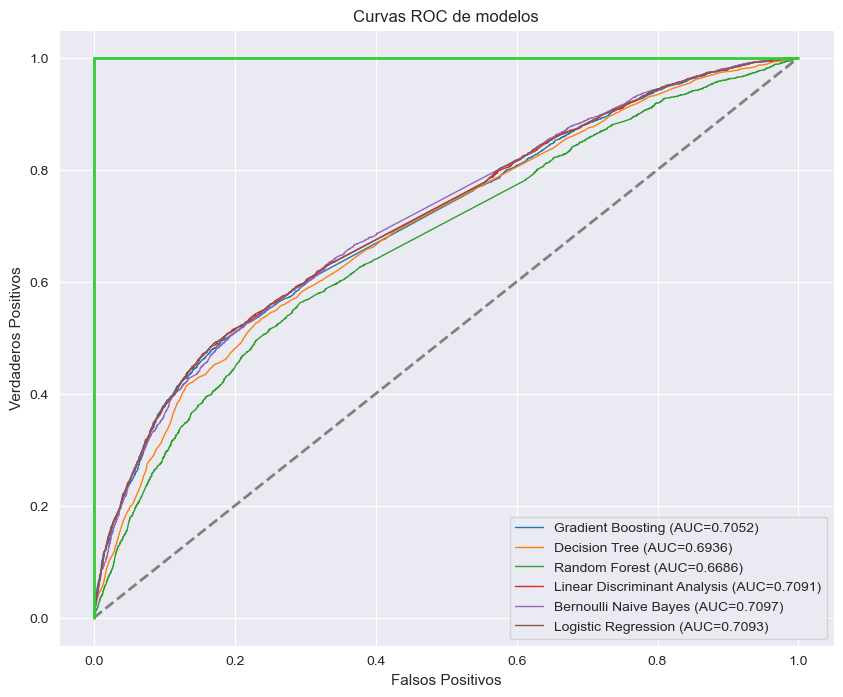

In [93]:
print_roc_auc(gb_model=gb_model_v3, dec_tree_model=dec_tree_model_v3, rf_model=rf_model_v3, 
            lda_model=lda_model_v3, bernoulli_nb_model=bernoulli_nb_model_v3, lr_model=lr_model_v3, X_test=X_test_scaled)

    De manera similar a lo observado en las métricas, es consistente que las curvas ROC tuvieran variaciones poco significativas, con un leve aumento del puntaje AUC en algunos casos.
    Al igual que antes, los resultados muestran que los modelos siguen siendo mejor que un clasificador aleatorio.

#### <span style="color:#87CEEB"> Generar un reporte comparativo del desempeño de los modelos

    A continuación se muestra un resumen de las métricas obtenidas para las tres iteraciones de los modelos de clasificación (datos validación).

In [94]:
def model_report(iteracion, gb_model, dec_tree_model, rf_model, lda_model, bernoulli_nb_model, lr_model):
    """
    Retorna un dataframe que contiene las métricas calculadas en la iteración i.

    Parameters
    ----------
    iteracion: int
        número de iteración de los modelos

    gb_model: variable
    modelo ajustado de Gradient Boosting Classifier

    dec_tree_model: variable
    modelo ajustado de Decision Tree Classifier

    rf_model: variable
    modelo ajustado de Linear Discriminant Analysis

    lda_model: variable
    modelo ajustado de Random Forest Classifier

    bernoulli_nb_model: variable
    modelo ajustado de BernoulliNB (NaiveBayes)

    lr_model: variable
    modelo ajustado de Logistic Regression

    Return
        df_report
    """
    model_names = [f'gb_model_v{iteracion}', f'dec_tree_model_v{iteracion}', f'rf_model_v{iteracion}', 
                    f'lda_model_v{iteracion}', f'bernoulli_nb_model_v{iteracion}', f'lr_model_v{iteracion}']

    model_fits =   [gb_model, dec_tree_model, rf_model, lda_model, bernoulli_nb_model, lr_model]
    classification_reports = []

    for model in model_fits:
        y_pred = model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, output_dict=True)
        classification_reports.append(pd.DataFrame(report).transpose())

    df_report = (pd.concat((classification_reports), axis=1, keys=model_names)).round(2)
    df_report = (df_report.drop('support', axis=1, level=1)).iloc[:3, :]

    return df_report

In [95]:
display('Primera iteración de modelos (Grilla tentativa):',
        model_report(1, gb_model_v1, dec_tree_model_v1, rf_model_v1, lda_model_v1, bernoulli_nb_model_v1, lr_model_v1),
        'Segunda iteración de modelos (Oversampling y grilla tentativa):',
        model_report(2, gb_model_v2, dec_tree_model_v2, rf_model_v2, lda_model_v2, bernoulli_nb_model_v2, lr_model_v2),
        'Tercera iteración de modelos (Oversampling y modificación de grilla):',
        model_report(3, gb_model_v3, dec_tree_model_v3, rf_model_v3, lda_model_v3, bernoulli_nb_model_v3, lr_model_v3))

'Primera iteración de modelos (Grilla tentativa):'

gb_model_v1                 dec_tree_model_v1                  \
           precision recall f1-score         precision recall f1-score   
0                0.7   0.89     0.79              0.70   0.87     0.77   
1                0.7   0.39     0.50              0.66   0.39     0.49   
accuracy         0.7   0.70     0.70              0.69   0.69     0.69   

         rf_model_v1                 lda_model_v1                  \
           precision recall f1-score    precision recall f1-score   
0               0.70   0.90     0.78          0.7   0.89     0.79   
1               0.69   0.38     0.49          0.7   0.39     0.50   
accuracy        0.70   0.70     0.70          0.7   0.70     0.70   

         bernoulli_nb_model_v1                 lr_model_v1                  
                     precision recall f1-score   precision recall f1-score  
0                         0.70   0.88     0.78        0.70   0.89     0.78  
1                         0.68   0.41     0.51        0.69   0.40     0.51  
accuracy                  0.70   0.70     0.70        0.70   0.70     0.70

'Segunda iteración de modelos (Oversampling y grilla tentativa):'

gb_model_v2                 dec_tree_model_v2                  \
           precision recall f1-score         precision recall f1-score   
0               0.71   0.85     0.78              0.71   0.79     0.75   
1               0.66   0.45     0.54              0.59   0.48     0.53   
accuracy        0.70   0.70     0.70              0.67   0.67     0.67   

         rf_model_v2                 lda_model_v2                  \
           precision recall f1-score    precision recall f1-score   
0               0.70   0.78     0.74         0.72   0.80     0.76   
1               0.58   0.48     0.52         0.62   0.51     0.56   
accuracy        0.66   0.66     0.66         0.69   0.69     0.69   

         bernoulli_nb_model_v2                 lr_model_v2                  
                     precision recall f1-score   precision recall f1-score  
0                         0.72   0.79     0.76        0.73   0.78     0.75  
1                         0.61   0.52     0.56        0.60   0.53     0.57  
accuracy                  0.69   0.69     0.69        0.68   0.68     0.68

'Tercera iteración de modelos (Oversampling y modificación de grilla):'

gb_model_v3                 dec_tree_model_v3                  \
           precision recall f1-score         precision recall f1-score   
0               0.71   0.84     0.77              0.72   0.78     0.75   
1               0.65   0.46     0.54              0.60   0.51     0.55   
accuracy        0.70   0.70     0.70              0.68   0.68     0.68   

         rf_model_v3                 lda_model_v3                  \
           precision recall f1-score    precision recall f1-score   
0               0.70   0.78     0.74         0.72   0.80     0.76   
1               0.58   0.48     0.52         0.62   0.51     0.56   
accuracy        0.66   0.66     0.66         0.69   0.69     0.69   

         bernoulli_nb_model_v3                 lr_model_v3                  
                     precision recall f1-score   precision recall f1-score  
0                         0.72   0.79     0.76        0.73   0.76     0.75  
1                         0.61   0.52     0.56        0.59   0.54     0.57  
accuracy                  0.69   0.69     0.69        0.68   0.68     0.68

#### <span style="color:#87CEEB"> Reportar cuáles son los dos mejores modelos en su desempeño

    Como criterio de elección de los dos modelos que presentaron el mejor desempeño, se tomará en consideración la métrica de recall obtenida debido a que esta fue la que menos porcentaje presentó en todas las iteraciones, el valor de f1_score y el tiempo obtenido de procesamiento de los modelos para el conjunto de datos en estudio.
 
    En este proyecto, los modelos de gradient boosting y random forest fueron los que tuvieron el mayor consumo de tiempo de procesamiento. A pesar de esto, los resultados obtenidos no fueron sobresalientes respecto al recall en ninguna de las iteraciones. En todas se obtuvieron valores bajo 0.5 para la clase 1 (sentimiento positivo). Con eso dicho, se descartan estos modelos.

    La métrica accuracy en este caso no tiene relevancia como factor para realizar la elección de los mejores modelos, debido a que los puntajes varían entre 0.66 y 0.7, aún cuando se observa que la métrica recall tiene un desempeño pobre, por lo que esta métrica no se consideró para la elección de los mejores modelos.

    Al evaluar los demás resultados, se observa que los modelos implementados con DecTree, LDA, BernoulliNB y LogisticRegression en su iteración 2 y 3 repiten casi en su totalidad las métricas obtenidas para las clases 0 y 1. 
    De estos, el modelo logístico obtuvo el mejor recall para la clase 1 con 0.54, le sigue el modelo de NaiveBayes(Bernoulli) con 0.52 y finalmente los modelos DecTree y LDA, ambos con 0.51.
    Al evaluar los puntajes f1, el mejor corresponde al modelo logistico en su iteración 3 presentando una diferencia entre clases de 18%,. Este será el primer modelo seleccionado.

    De los modelos restantes, al tener los mismos resultados obtenidos en las iteraciones 2 y 3 se elige al segundo modelo mejor en general, en términos de recall para la clase 1. Este es el implementado con BernoulliNB.
    Ahora bien, para seleccionar la mejor iteración se evalúan las matrices de confusión de ambos modelos. Estas matrices se mostraron en las secciones de reporte de métricas cuando se entrenaron los modelos.
    Las matrices obtenidas muestran que el cuadrante correspondiente a 'verdaderos positivos' para la iteración 2 supera en 5 unidades a la iteración 3. Por ende, el segundo modelo seleccionado es el implementado con BernoulliNB en su segunda iteración al tener mayores clasificaciones correctas en su diagonal principal.

    En resumen, considero que los dos mejores modelos son los implementados con LogisticRegression en su iteración 3 y BernoulliNB en su iteración 2 de acuerdo a lo explicado anteriormente.
    Cabe señalar, que la elección realizada no implica que los demás modelos sean malos, ya que en general se obtuvieron métricas similares en la mayoría, lo que demuestra que para este grupo de datos, los modelos implementados se desempeñan de manera semejante.

    Como observación final respecto a lo experimentado, lo más efectivo fue realizar oversampling (balance de clases) igualando la cantidad de observaciones de la clase minoritaria con la mayoritaria. Con esto se observó el mayor incremento de desempeño en los modelos implementados. Por otro lado, al tratar de refinar la grilla de parámetros el incremento de desempeño fue poco significativo.
    Es posible que la elección de los hiperparámetros no haya sido la idónea para la tercera iteración y que debido a eso la mejora en desempeño fuera casi nula.

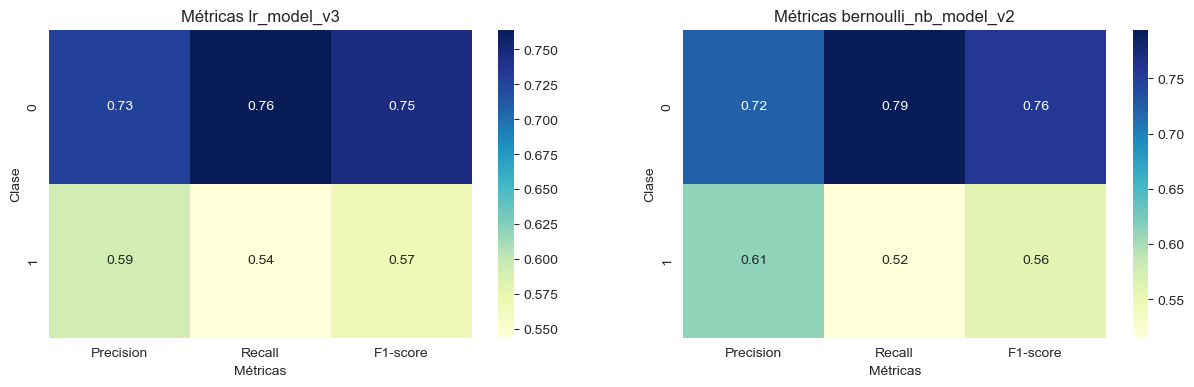

In [96]:
def plot_classification_report(y_true, y_pred, model, axs=None):
    cl_report = classification_report(y_true=y_true, y_pred=y_pred, output_dict=True)
    metricas = ['precision', 'recall', 'f1-score']
    clases = list(cl_report.keys())[0:-3]
    datos = []

    for clase in clases:
        row = []
        for metrica in metricas:
            row.append(cl_report[clase][metrica])
        datos.append(row)

    datos = np.array(datos)
    cmap = plt.get_cmap("YlGnBu")
    if not axs:
        fig, axs = plt.subplots(ncols=1, figsize=(7, 4))
    sns.set_style("whitegrid")
    axs = sns.heatmap(datos[:,0:3], annot=True, cmap=cmap, xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=clases, cbar=True, ax=axs)
    axs.set_title(f'Métricas {model}')
    axs.set_xlabel('Métricas')
    axs.set_ylabel('Clase')
    return axs

fig, axs = plt.subplots(ncols=2, figsize=(15, 4))
plot_classification_report(y_true=y_test, y_pred=lr_yhat_test_v3, model='lr_model_v3', axs=axs[0])
plot_classification_report(y_true=y_test, y_pred=bernoulli_nb_yhat_test_v2, model='bernoulli_nb_model_v2', axs=axs[1])
plt.show()

#### <span style="color:#87CEEB"> Archivo serializado

In [97]:
# import pickle
pickle.dump((# top 2, modelos ajustados
            lr_model_v3,
            bernoulli_nb_model_v2),
            open('modelos_hito_3_rodrigo_sepulveda_prueba_1.sav', 'wb'))

```python
# Lectura archivo .sav
read_top_2_models = pickle.load(open("modelos_hito_3_rodrigo_sepulveda_prueba_1.sav","rb"))

# Guardar datos en variables correspondientes
modelo_1, modelo_2 = read_top_2_models
```